<h1>周波数応答</h1>

Pythonによる制御工学入門 P125~

伝達関数$P(s)$のステップ応答は、その制御対象の出力は$y(s)=P(s)u(s)$と表現できるので、$u(s)=1$となる信号を入力したときの応答が伝達関数になることがわかりそうです。  

ここで、$u(s)=1$となる信号$u(t)$、つまるある単位時間のうちに$1$となる信号は**インパルス入力**と呼ばれ、$t=0$のときに$\infty$の大きさを持ち、そうでないときの時間$t$のときは$0$になる**ディラックのデルタ関数**$\delta(t)$になります。　　

このインパルス入力を加えたときの**インパルス応答**をラプラス変換したものが伝達関数になります。  
~~な、なんだってー~~

しかし、現実にはインパルス入力をモデルに投げるのは無理です。（無限大の信号をどうするんだ？）  
そこで、周波数の異なる余弦波の集まり（線形和）をインパルス入力と見なします。

In [1]:
# Please write here sorce code of convolv cos wave.

とどのつまり、複数の余弦波信号を畳みこんだものをインパルス入力と見なしてモデルに投げれば、周り回って制御対象の特徴を調べることができるようになります。  
~~科学の力ってすげー!~~

/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


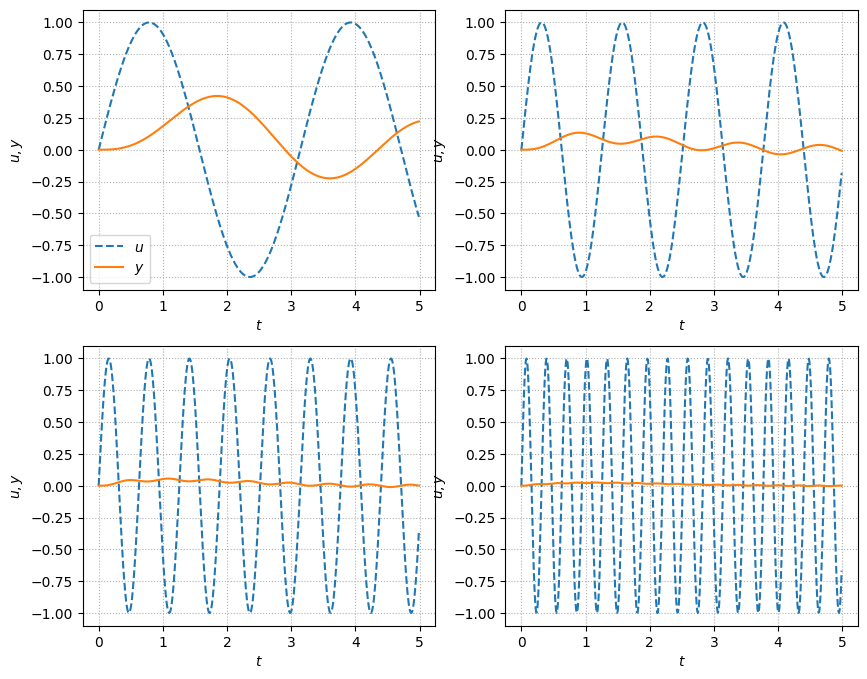

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import tf, lsim

from plot import plot_set

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

zeta = 0.7
omega_n = 1.0
P = tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])

freq = [2, 5, 10, 20]
Td = np.arange(0, 5, 0.01)
for i in range(2):
    for j in range(2):
        u = np.sin(freq[2*i+j]*Td)
        y, t, _ = lsim(P, u, Td)

        ax[i, j].plot(t, u, ls='--', label='$u$')
        ax[i, j].plot(t, y, label='$y$')
        plot_set(ax[i, j], '$t$', '$u, y$')

ax[0, 0].legend()

上記のコードは正弦波（位相が違うが大体一緒）を加えたときの出力応答で、周波数が低いときの入出力の振幅はほぼ一緒ですが、周波数を徐々に上げていくと、入出力の振幅が小さくなることがわかります。つまり、位相がずれていることがわかります。  

制御と紐づけて言えば、周波数が低いと入出力の振幅比（ゲイン）が大きくなり、入力信号の周波数が高いとゲインは小さくなり、位相のずれも大きくなります。

整理すると、入力信号が$u(t)=Asin(\omega t)$のとき、出力は$y(t)=B(\omega)sin(\omega t + \phi(\omega))$になります。この入出力を$\frac{B(\omega)}{A}$とすることで振幅比と位相$\phi(\omega)$の関係を表し、周波数による入出力の違いを確認すること、すなわちインパルス応答を見ることができるようになる。

<h2>1次遅れ系</h2>

1次遅れ系のボード線図を書いていきます。描く対象のモデルは1次遅れ系で時定数$T=1, 0.5, 0.1$と変化させて見ていきます。

/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


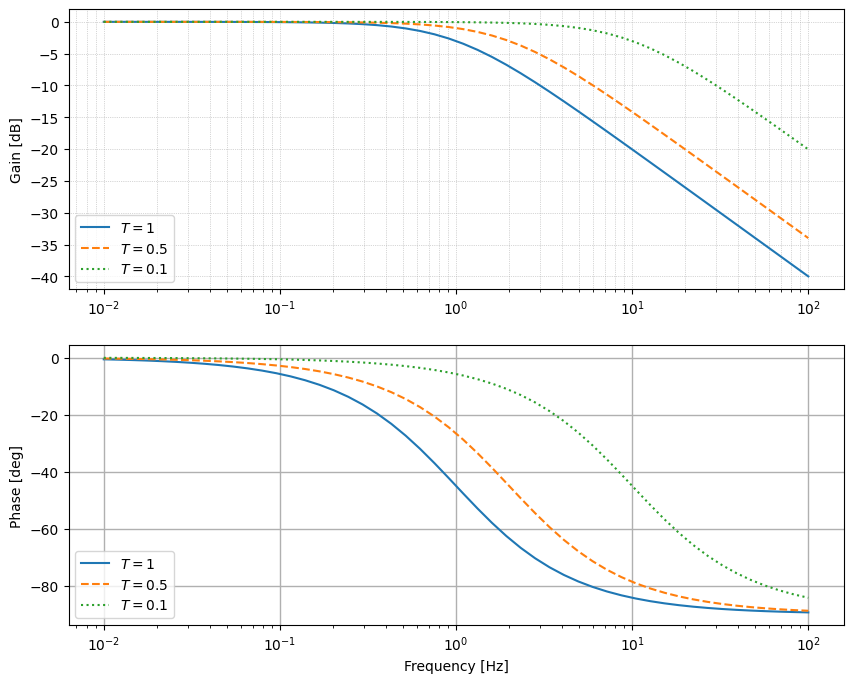

In [7]:
from control.matlab import tf, bode, logspace, mag2db
from plot import linestype_generator, boadplot_set

LS = linestype_generator()
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

K = 1.0
T = [1, 0.5, 0.1]
for ti in T:
    P = tf([0, K], [ti, 1])
    mag, phase, w = bode(P, logspace(-2, 2), plot=False)

    pltargs = {'ls': next(LS), 'label': f'$T={ti}$'}
    ax[0].semilogx(w, mag2db(mag), **pltargs)
    ax[1].semilogx(w, np.rad2deg(phase), **pltargs)

boadplot_set(ax, 3, 3)

ゲイン線図を見てみると、低周波数域の場合のデシベル数は$0$に等しく、周波数が高くなるにつれてゲイン・デシベル数は下がっていきます。  

このことから、入力信号の周波数が低いときは出力される信号との振幅はほぼ誤差のレベルで等しく、周波数が高くなると出力信号の振幅が小さくなり、ほぼ平面に近くなることが分かります。  
**要再考。ゲインと周波数の関係が良く分かっていない**

位相線図は直観的に分かる。低周波域のときは位相は$0deg$なのに対し、周波数が上がると位相がずれていることが分かります。実際に$T=1$における最大周波数の時は$-90deg$近く遅れていることがわかり、$\frac{1}{T}[rad/s]$付近だと$-45deg$遅れになっていることが分かります。

<h2>2次遅れ系</h2>

次は2次遅れ系のボード線図を見ていきます。

/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


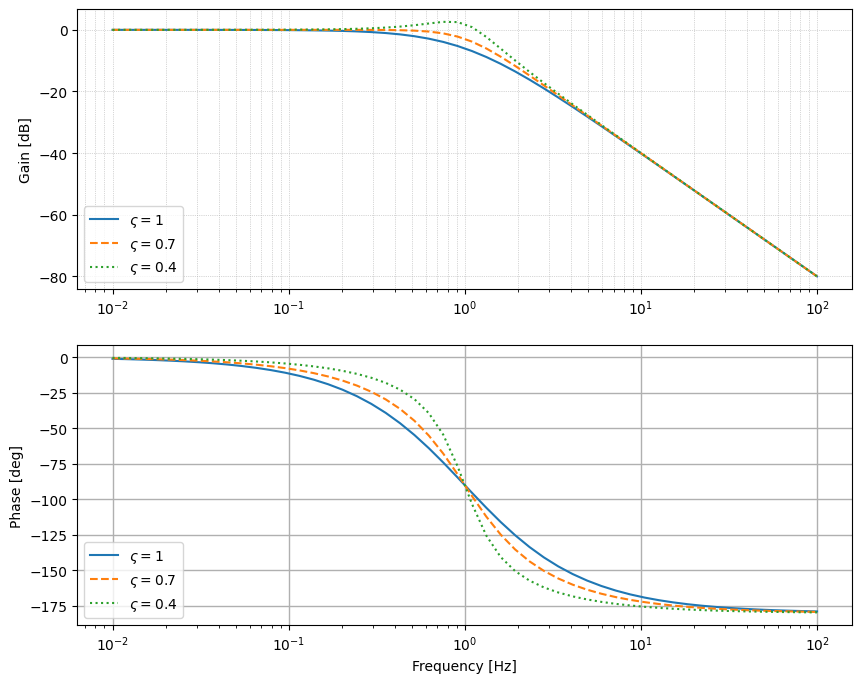

In [11]:
LS = linestype_generator()
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

zeta = [1, 0.7, 0.4]
omega_n = 1.0
for zi in zeta:
    P = tf([0, omega_n**2], [1, 2*zi*omega_n, omega_n**2])
    mag, phase, w = bode(P, logspace(-2, 2), plot=False)

    pltargs = {'ls': next(LS), 'label': f'$\\varsigma={zi}$'}
    ax[0].semilogx(w, mag2db(mag), **pltargs)
    ax[1].semilogx(w, np.rad2deg(phase), **pltargs)

boadplot_set(ax, 3, 3)

ゲイン線図では低周波域では$0db$ですが、高周波域に入るにつ入れて、ヒンジのようにゲインが下がっていきます。そして$-40dB/dec$の傾きで再び出力との差が縮まっていることが確認できます。この傾向は$\varsigma$を変化させても余り変化はありません。これは、時間応答でオーバーシュートが大きくなることと紐づけられます。

位相線図はそのまま、低周波域では$0dB$ですが、周波数域が高くなると$-180deg$に漸近します。また、$\varsigma$を小さくするほど$10^0$付近で傾きが大きくなります。これは、この周波数域だと入力と出力が極端に大きくなっていることを表しています（と思われる）。

/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/home/suitai/workspace/Python/venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


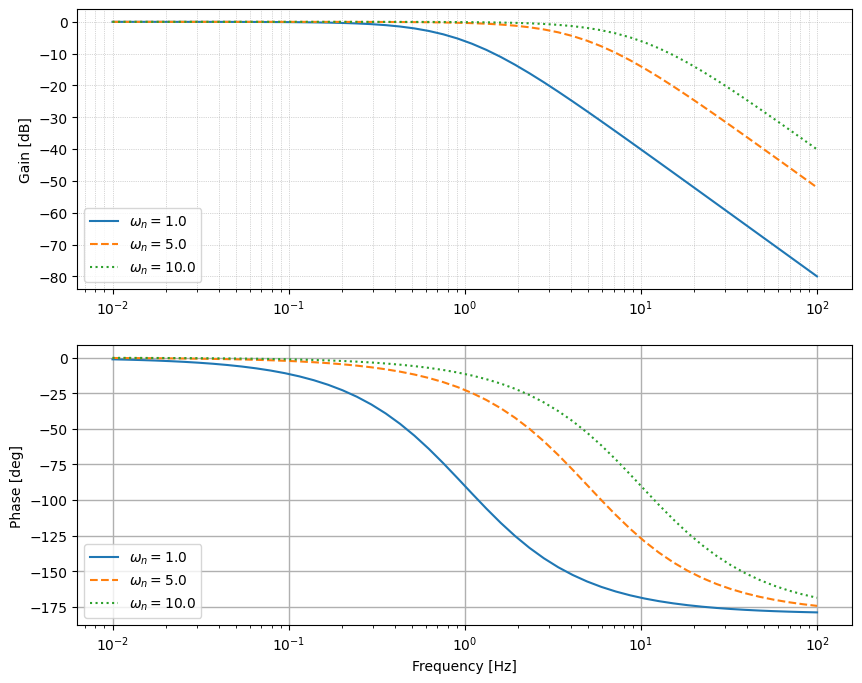

In [13]:
LS = linestype_generator()
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

zeta = 1
omega_ns = [1.0, 5.0, 10.0]
for omega_n in omega_ns:
    P = tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
    mag, phase, w = bode(P, logspace(-2, 2), plot=False)

    pltargs = {'ls': next(LS), 'label': f'$\\omega_n={omega_n}$'}
    ax[0].semilogx(w, mag2db(mag), **pltargs)
    ax[1].semilogx(w, np.rad2deg(phase), **pltargs)

boadplot_set(ax, 3, 3)

$\omega_n=1, 5, 10$とすると、ゲインが小さくなる周波数が変わることが分かります。実際に$\omega_n=1$の時のゲインは$-80dB$近くまで落ちているのに対し、それ$\omega_n=5$と$\omega_n=10$のときとでは差が小さくなっていることが分かります。つまるところ、$\omega_n=5$からだと入出力とのずれは徐々に0へ漸近していく？

位相線図でも、$-90deg$遅れになるのは$Hz(\omega[rad/s])$が$\omega = \omega_n$のときであることがわかります。